# Nettoyage des données de précipitation OCEau

## Libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import Cleaning as clean
os.chdir("..")
import re
from datetime import date, datetime, time

# Importation des données

In [2]:
#données en mm/h
df= pd.read_excel("Data/Pluie5Min.xlsx",header = 0)
df.head()

Unnamed: 0   AR   BA   CE   CR   DD   ER   ES   FO   GF   LA   LC  \
0 2023-01-01 00:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1 2023-01-01 00:05:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 2023-01-01 00:10:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 2023-01-01 00:15:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4 2023-01-01 00:20:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    SA  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0

In [3]:
df = df.rename(columns = {"Unnamed: 0" : "time"})
df.time = pd.to_datetime(df.time,utc=True)

# Observing data to find potential errors

In [4]:
df.describe()

AR             BA             CE             CR  \
count  105121.000000  105121.000000  105121.000000  105121.000000   
mean        0.098298       0.112008       0.102111       0.111220   
std         0.675030       0.878901       0.857200       0.767776   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        63.600000     124.800000     130.800000      58.800000   

                  DD             ER             ES             FO  \
count  105121.000000  105121.000000  105121.000000  105121.000000   
mean        0.097282       0.105604       0.123321       0.113321   
std         0.906817       0.897370       0.770383       0.830593   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       154.800000     128.400000      49.200000      69.600000   

                  GF             LA             LC             SA  
count  105121.000000  105121.000000  105121.000000  105121.000000  
mean        0.090513       0.103880       0.091597       0.125022  
std         2.104655       0.822511       0.664682       0.773738  
min      -596.400000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max       199.200000      74.400000      79.200000      44.400000

#### We observe  a negative value and decide to replace all negative values with nan

In [5]:
df[df.GF <0] #identifier une valeure anormale repéré

time   AR   BA   CE   CR   DD   ER   ES  \
68832 2023-08-27 23:59:59.981000+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        FO     GF   LA   LC   SA  
68832  0.0 -596.4  0.0  0.0  0.0

In [6]:
# Set the timestamp column as the index
df.set_index('time', inplace=True)
# Replace negative values with NaN
df = df.mask(df < 0)
df.iloc[68832,:]

AR    0.0
BA    0.0
CE    0.0
CR    0.0
DD    0.0
ER    0.0
ES    0.0
FO    0.0
GF    NaN
LA    0.0
LC    0.0
SA    0.0
Name: 2023-08-27 23:59:59.981000+00:00, dtype: float64

#### Convert from mm/h to mm/5min 

In [7]:
#Convert from mm/h to mm/5min 
df_5min = df.map(lambda x : x/12)
df_5min.describe()

AR             BA             CE             CR  \
count  105121.000000  105121.000000  105121.000000  105121.000000   
mean        0.008192       0.009334       0.008509       0.009268   
std         0.056253       0.073242       0.071433       0.063981   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         5.300000      10.400000      10.900000       4.900000   

                  DD             ER             ES             FO  \
count  105121.000000  105121.000000  105121.000000  105121.000000   
mean        0.008107       0.008800       0.010277       0.009443   
std         0.075568       0.074781       0.064199       0.069216   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        12.900000      10.700000       4.100000       5.800000   

                  GF             LA             LC             SA  
count  105120.000000  105121.000000  105121.000000  105121.000000  
mean        0.008016       0.008657       0.007633       0.010418  
std         0.085181       0.068543       0.055390       0.064478  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max        16.600000       6.200000       6.600000       3.700000

# Basic observations

Precipitation on whole year

c:\Users\arian\anaconda3\envs\design\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


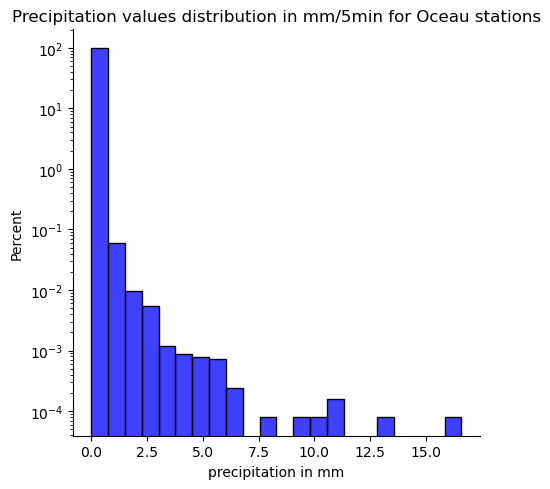

In [10]:
_= clean.melting_and_plot_precip(df_5min)

# Sum data on hour to use in the algorithms

In [9]:
# Resample the DataFrame to hourly frequency and take the first entry in each hour
dfhour = df_5min.resample('H').sum()
dfhour

C:\Users\arian\AppData\Local\Temp\ipykernel_65008\3043546889.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfhour = df_5min.resample('H').sum()


AR   BA   CE   CR   DD   ER   ES   FO   GF   LA  \
time                                                                          
2023-01-01 00:00:00+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2023-01-01 01:00:00+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2023-01-01 02:00:00+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2023-01-01 03:00:00+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2023-01-01 04:00:00+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2023-12-31 19:00:00+00:00  0.1  0.1  0.0  0.1  0.1  0.0  0.1  0.0  0.1  0.0   
2023-12-31 20:00:00+00:00  1.2  1.6  1.2  1.2  1.3  0.7  1.0  1.6  1.4  1.1   
2023-12-31 21:00:00+00:00  0.1  0.1  0.1  0.0  0.0  0.1  0.0  0.0  0.1  0.2   
2023-12-31 22:00:00+00:00  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0   
2023-12-31 23:00:00+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                            LC   SA  
time                                 
2023-01-01 00:00:00+00:00  0.0  0.0  
2023-01-01 01:00:00+00:00  0.0  0.0  
2023-01-01 02:00:00+00:00  0.0  0.0  
2023-01-01 03:00:00+00:00  0.0  0.0  
2023-01-01 04:00:00+00:00  0.0  0.0  
...                        ...  ...  
2023-12-31 19:00:00+00:00  0.1  0.3  
2023-12-31 20:00:00+00:00  1.4  0.1  
2023-12-31 21:00:00+00:00  0.0  0.1  
2023-12-31 22:00:00+00:00  0.0  0.0  
2023-12-31 23:00:00+00:00  0.0  0.0  

[8760 rows x 12 columns]

# Basic observations

c:\Users\arian\anaconda3\envs\design\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


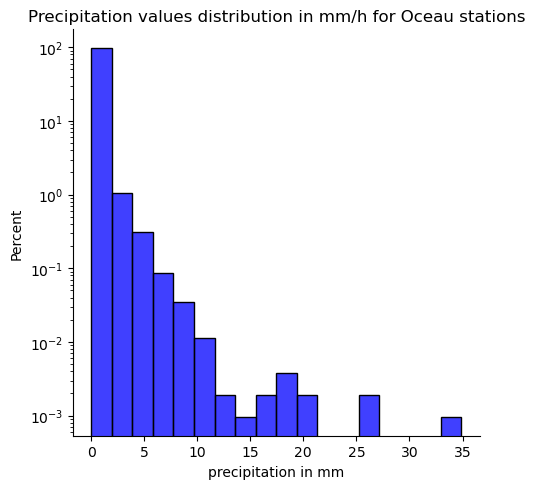

In [12]:
_ = clean.melting_and_plot_precip(dfhour, title  = "Precipitation values distribution in mm/h for Oceau stations")

#### filtering by date

In [13]:
def format_datetime(dfhour):
    dfhour.time = dfhour.time.dt.strftime('%Y-%m-%d %H:%M:%S')
    dfhour = dfhour.set_index("time")
    return dfhour

In [14]:
#Format date the good way for it to funciton in the algorithms
dfhour.reset_index(inplace = True)
dfhour.time = pd.to_datetime(dfhour.time,utc=True)
after_april = dfhour[dfhour.time.dt.month >= 4]

dfhour = format_datetime(dfhour)

In [15]:
after_april = format_datetime(after_april)

C:\Users\arian\AppData\Local\Temp\ipykernel_65008\3435183059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhour.time = dfhour.time.dt.strftime('%Y-%m-%d %H:%M:%S')


# Export the excels

In [16]:
dfhour.to_csv("Data/Clean_data/oceau_hour_total.csv")


In [17]:
after_april.to_csv("Data/Clean_data/oceau_hour_after_april.csv")